In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading model


In [7]:
cnn=tf.keras.models.load_model('/content/trained_model.h5')

##Visualization and performing prediction on single image


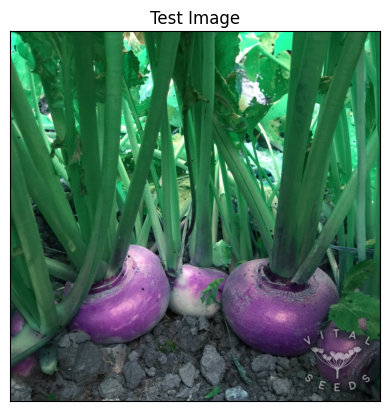

In [8]:
import cv2
image_path="/content/drive/MyDrive/fruit_vegetable_dataset/test/turnip/Image_2.jpg"
img=cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

##Testing Model

In [9]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])#converting single image to batch
predictions=cnn.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


In [10]:
print(predictions)

[[4.4238436e-19 1.2670992e-27 2.0850982e-18 5.5354311e-24 5.0888445e-18
  2.1495430e-22 2.9716057e-25 6.9366672e-14 2.2384743e-21 8.9667150e-23
  1.2587050e-15 4.1742641e-11 5.9462098e-13 1.4100522e-10 2.8398905e-16
  7.4789473e-16 1.8451420e-23 1.6759535e-26 1.6557172e-15 2.3978214e-24
  1.4375897e-16 8.4048217e-18 5.5182958e-22 1.3691247e-21 1.1059694e-17
  1.2210524e-18 1.6576313e-16 4.6252276e-13 8.7451137e-15 8.6894339e-18
  1.3836820e-13 1.8573298e-24 5.9500126e-16 1.0148848e-21 1.0000000e+00
  5.2945573e-15]]


In [11]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetable_dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 330 files belonging to 36 classes.


In [12]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [13]:
result_index=np.where(predictions[0]==max(predictions[0]))
print(result_index)

(array([34]),)


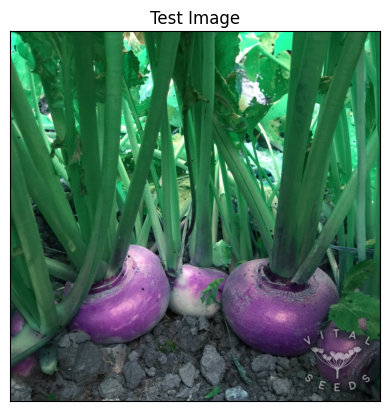

In [14]:
#display image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a turnip


In [16]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [17]:
file=open("labels.txt","w")
for i in test_set.class_names:
  file.write(i+'\n')
file.close()

In [18]:
with open("labels.txt") as f:
  content=f.readlines()

In [19]:
content

['apple\n',
 'banana\n',
 'beetroot\n',
 'bell pepper\n',
 'cabbage\n',
 'capsicum\n',
 'carrot\n',
 'cauliflower\n',
 'chilli pepper\n',
 'corn\n',
 'cucumber\n',
 'eggplant\n',
 'garlic\n',
 'ginger\n',
 'grapes\n',
 'jalepeno\n',
 'kiwi\n',
 'lemon\n',
 'lettuce\n',
 'mango\n',
 'onion\n',
 'orange\n',
 'paprika\n',
 'pear\n',
 'peas\n',
 'pineapple\n',
 'pomegranate\n',
 'potato\n',
 'raddish\n',
 'soy beans\n',
 'spinach\n',
 'sweetcorn\n',
 'sweetpotato\n',
 'tomato\n',
 'turnip\n',
 'watermelon\n']